In [1]:
# Carga de librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode, skew, kurtosis, t
from scipy.stats import kstest, norm
from scipy.stats import shapiro
from scipy.stats import f

In [2]:
# Lectura archivo xlsx
import os
directorio = os.getcwd()
ruta = os.path.join(directorio, "datosejercicioevaluacionanchuras.xlsx")
datos = pd.read_excel(ruta)
print(datos.head())

   Época histórica  Anchura del cráneo
0                1                 133
1                1                 131
2                1                 131
3                1                 132
4                1                 134


In [3]:
# Subgrupos

temprano = datos[datos['Época histórica'] == 1]['Anchura del cráneo']
tardio = datos[datos['Época histórica'] == 2]['Anchura del cráneo']

### Ejercicio 1

##### Apartado a

In [4]:
def medidas(df):
    medidas = {
        'Mode': mode(df),
        'Range': np.max(df) - np.min(df),
        'Variance': np.var(df),
        'Pearson_Coefficient': np.std(df) / np.mean(df),
        'Fisher_Coefficient': skew(df),
        'Curtosis': kurtosis(df)
    }
    return medidas

medidas_temp = temprano.describe()
medidas_tard = tardio.describe()

medidas_temp2 = medidas(temprano)
medidas_tard2 = medidas(tardio)

medidas_temprano = {**medidas_temp.to_dict(), **medidas_temp2}
medidas_tardio = {**medidas_tard.to_dict(), **medidas_tard2}

print("Medidas para la submuestra de predinástico temprano:")
for key, value in medidas_temprano.items():
    print(f"{key}: {value}")
    
print("Medidas para la submuestra de predinástico tardío:")
for key, value in medidas_tardio.items():
    print(f"{key}: {value}")

Medidas para la submuestra de predinástico temprano:
count: 30.0
mean: 131.53333333333333
std: 0.8193072487266863
min: 130.0
25%: 131.0
50%: 131.5
75%: 132.0
max: 134.0
Mode: ModeResult(mode=131, count=13)
Range: 4
Variance: 0.6488888888888891
Pearson_Coefficient: 0.0061241996825111885
Fisher_Coefficient: 0.6569830307466812
Curtosis: 1.304372302495782
Medidas para la submuestra de predinástico tardío:
count: 30.0
mean: 132.46666666666667
std: 1.0080138659874618
min: 131.0
25%: 132.0
50%: 133.0
75%: 133.0
max: 135.0
Mode: ModeResult(mode=133, count=13)
Range: 4
Variance: 0.9822222222222224
Pearson_Coefficient: 0.007481665197442631
Fisher_Coefficient: 0.19510554794191115
Curtosis: -0.18623697303495312


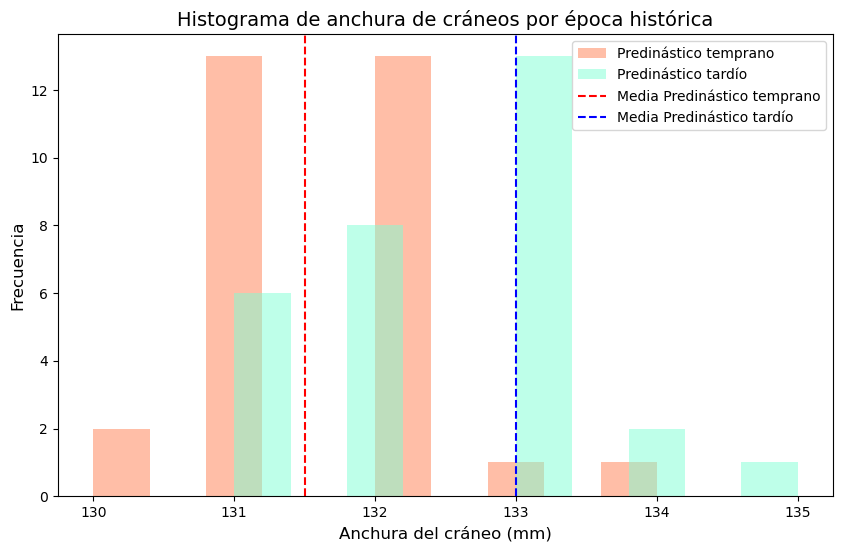

In [5]:
# Histograma

plt.figure(figsize=(10, 6))
plt.hist(temprano, bins=10, alpha=0.5, label='Predinástico temprano', color='coral')
plt.hist(tardio, bins=10, alpha=0.5, label='Predinástico tardío', color='aquamarine')
plt.axvline(x=np.median(temprano), color='red', linestyle='--', label='Media Predinástico temprano')
plt.axvline(x=np.median(tardio), color='blue', linestyle='--', label='Media Predinástico tardío')
plt.title('Histograma de anchura de cráneos por época histórica', fontsize=14)
plt.xlabel('Anchura del cráneo (mm)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.show()

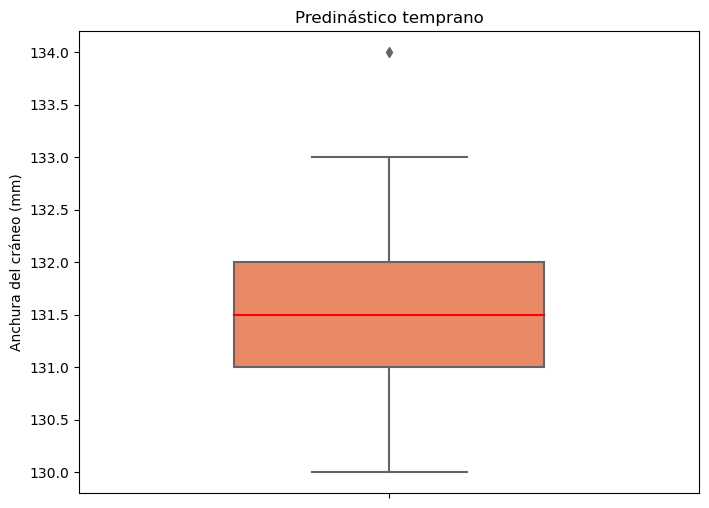

In [10]:
# Diagramas de caja y bigotes

# Predinástico temprano

plt.figure(figsize=(8, 6))
sns.boxplot(y=temprano, color='coral', width = 0.5, medianprops=dict(color='red'))
plt.title('Predinástico temprano')
plt.ylabel('Anchura del cráneo (mm)')
plt.show()

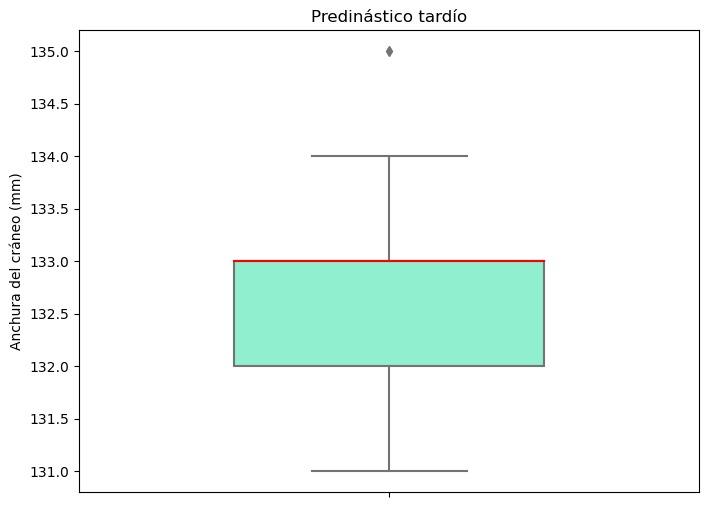

In [11]:
# Predinástico tardío

plt.figure(figsize=(8, 6))
sns.boxplot(y=tardio, color='aquamarine', width = 0.5, medianprops=dict(color='red'))
plt.title('Predinástico tardío')
plt.ylabel('Anchura del cráneo (mm)')
plt.show()

##### Apartado b

In [6]:
temp_norm = (temprano - np.mean(temprano)) / np.std(temprano)
tard_norm = (tardio - np.mean(tardio)) / np.std(tardio)


# temp_norm = temprano - np.mean(temprano)
# tard_norm = tardio - np.mean(tardio)

In [7]:
# test para el subgrupo temprano test kolmogorov smirnov
resultados_temp = kstest(temp_norm,'norm')
# pvalor = 0 no se rech la h0, los datos siguen una distribucion normal
# test para el subgrupo tardio
resultados_tard = kstest(tard_norm, 'norm')
# pvalor = 0  se rech la h0, los datos no siguen una distribucion normal

In [8]:
print("Resultados predinóstico temprano:")
print("estadistico:", resultados_temp.statistic)
print("pvalor:", resultados_temp.pvalue)
if resultados_temp.pvalue > 0.05:
    print("El grupo temprano sigue una distribución normal")
else:
    print("El grupo temprano no sigue una distribución normal")

print("Resultados predinóstico tardio:")
print("estadistico:", resultados_tard.statistic)
print("pvalor:", resultados_tard.pvalue)
if resultados_tard.pvalue > 0.05:
    print("El grupo tardio sigue una distribución normal")
else:
    print("El grupo tardio no sigue una distribución normal")

Resultados predinóstico temprano:
estadistico: 0.2460415331404474
pvalor: 0.04379464338101191
El grupo temprano no sigue una distribución normal
Resultados predinóstico tardio:
estadistico: 0.23809252465886277
pvalor: 0.05572704984817678
El grupo tardio sigue una distribución normal


In [12]:
## elimino valores atipicos de los dos
Q1 = temprano.quantile(0.25)
Q3 = temprano.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Elimina los valores atípicos
temprano_sinatip = temprano[(temprano >= lower_bound) & (temprano <= upper_bound)]

In [22]:
temprano_limpio = temprano.drop([4,18])
tardio_limpio = tardio.drop([34,48])

In [14]:
temp_norm = (temprano_limpio - np.mean(temprano_limpio)) / np.std(temprano_limpio)
resultados_temp = kstest(temp_norm,'norm')

# pvalor = 0  se rech la h0, los datos no siguen una distribucion normal
print("Resultados predinóstico temprano:")
print("estadistico:", resultados_temp.statistic)
print("pvalor:", resultados_temp.pvalue)
if resultados_temp.pvalue > 0.05:
    print("El grupo temprano sigue una distribución normal")
else:
    print("El grupo temprano no sigue una distribución normal")


Resultados predinóstico temprano:
estadistico: 0.27626019502650634
pvalor: 0.018984169632381365
El grupo temprano no sigue una distribución normal


### Ejercicio 2

1. Definir si las muestras son independientes – en el enunciado b se nos proporciona que asumamos independencia de muestras
2. Sabemos que las varianzas poblacionales son desconocidas
3. Demostrar si las varianzas poblacionales son iguales o diferentes 

In [27]:
from scipy.stats import f
# Calcula las desviaciones estándar de ambas muestras
desv_std_temprano = np.std(temprano)
desv_std_tardio = np.std(tardio)

# Calcula el estadístico F
estadistico_F = desv_std_temprano**2 / desv_std_tardio**2

# Calcula los valores críticos y el valor p
valor_critico_inf = f.ppf(0.05/2, len(temprano)-1, len(tardio)-1)
valor_critico_sup = f.ppf(1 - 0.05/2, len(temprano)-1, len(tardio)-1)
p_valor = f.cdf(estadistico_F, len(temprano)-1, len(tardio)-1)

# Imprime los resultados
print("Valores Críticos:")
print("Valor Crítico Inferior:", valor_critico_inf)
print("Valor Crítico Superior:", valor_critico_sup)
print("\nValor Observado (Estadístico F):", estadistico_F)
print("Valor p:", p_valor)

Valores Críticos:
Valor Crítico Inferior: 0.47596477431003137
Valor Crítico Superior: 2.100995817284212

Valor Observado (Estadístico F): 0.660633484162896
Valor p: 0.1350663442179744


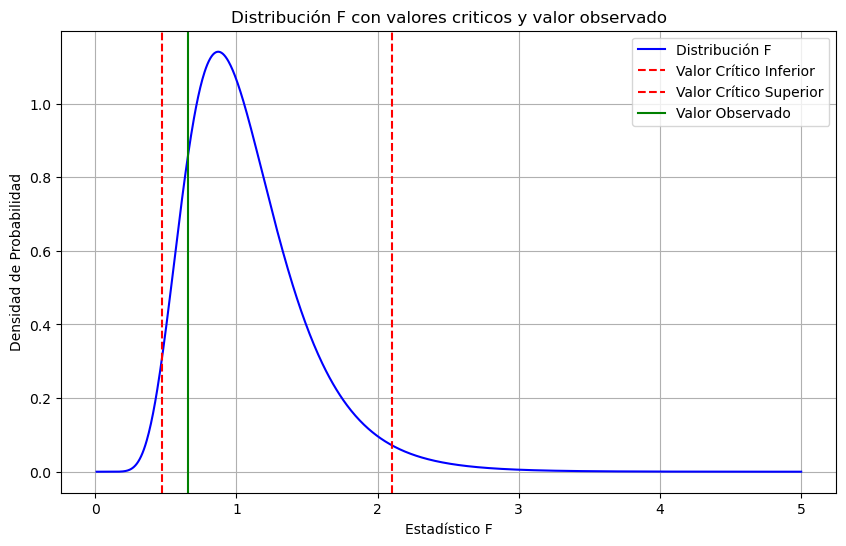

In [30]:
dfn = len(temprano) - 1
dfd = len(tardio) - 1
x = np.linspace(0.01, 5, 1000)
y = f.pdf(x, dfn, dfd)
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='Distribución F')
plt.axvline(valor_critico_inf, color='red', linestyle='--', label='Valor Crítico Inferior')
plt.axvline(valor_critico_sup, color='red', linestyle='--', label='Valor Crítico Superior')
plt.axvline(estadistico_F, color='green', linestyle='-', label='Valor Observado')

plt.title('Distribución F con valores criticos y valor observado')
plt.xlabel('Estadístico F')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

plt.grid(True)
plt.show()

In [31]:
media_temprano = np.mean(temprano)
media_tardio = np.mean(tardio)
std_temprano = np.std(temprano, ddof=1)  # Usamos ddof=1 para calcular la desviación estándar muestral
std_tardio = np.std(tardio, ddof=1)
# Tamaño de las muestras
n_temprano = len(temprano)
n_tardio = len(tardio)

In [33]:
# diferencia entre las medias
diff_medias = media_temprano - media_tardio
# grados de libertad
df = n_temprano + n_tardio - 2
# errores estándar de la diferencia de medias
stderr_diff = np.sqrt((n_temprano*std_temprano**2+n_tardio*std_tardio**2)*((1/n_temprano)+(1/n_tardio)))/np.sqrt(df)

In [36]:
# valores t críticos para los niveles de confianza 0.9, 0.95 y 0.99
t_90 = t.ppf(0.95, df)  # 0.9 de nivel de confianza (dos colas)
t_95 = t.ppf(0.975, df)  # 0.95 de nivel de confianza (dos colas)
t_99 = t.ppf(0.995, df)  # 0.99 de nivel de confianza (dos colas)

In [37]:
# límites inferior y superior para cada nivel de confianza
ci_90_lower = diff_medias - t_90 * stderr_diff
ci_90_upper = diff_medias + t_90 * stderr_diff

ci_95_lower = diff_medias - t_95 * stderr_diff
ci_95_upper = diff_medias + t_95 * stderr_diff

ci_99_lower = diff_medias - t_99 * stderr_diff
ci_99_upper = diff_medias + t_99 * stderr_diff

print("Intervalo de confianza del 90%:", (ci_90_lower, ci_90_upper))
print("Intervalo de confianza del 95%:", (ci_95_lower, ci_95_upper))
print("Intervalo de confianza del 99%:", (ci_99_lower, ci_99_upper))

Intervalo de confianza del 90%: (-1.3365370178425786, -0.5301296488240956)
Intervalo de confianza del 95%: (-1.4161777177709256, -0.45048894889574853)
Intervalo de confianza del 99%: (-1.5757582313054241, -0.2909084353612502)


In [50]:
alfa = 0.025
df = n_temprano + n_tardio - 2

valor_critico_superior = t.ppf(1 - alfa, df)
valor_critico_inferior = t.ppf(alfa, df)
estadistico_t = (np.mean(temprano)-np.mean(tardio)) /stderr_diff

print("Valor crítico inferior:", valor_critico_inferior)
print("Valor crítico superior:", valor_critico_superior)
print("Valor estadistico T:", estadistico_t)

Valor crítico inferior: -2.0017174830120927
Valor crítico superior: 2.0017174830120923
Valor estadistico T: -3.8692997392678223


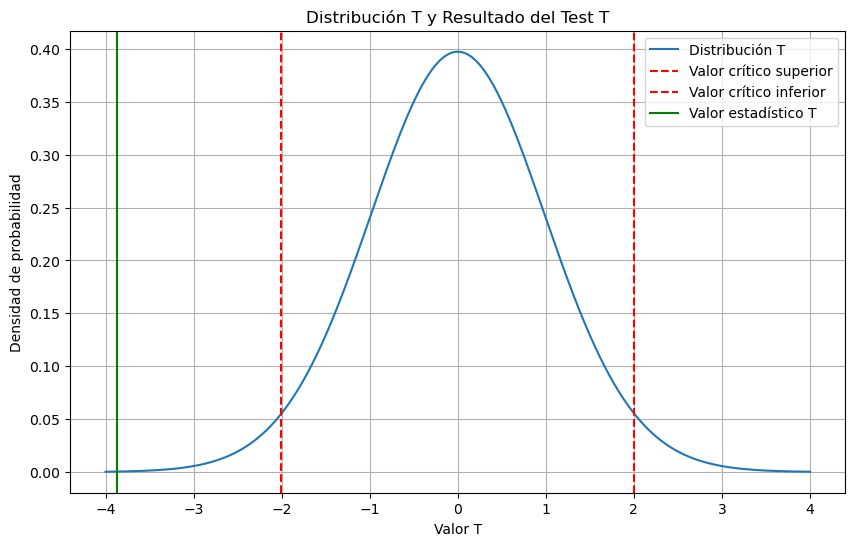

In [51]:
plt.figure(figsize=(10, 6))
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df)
plt.plot(x, y, label='Distribución T')
plt.axvline(valor_critico_superior, color='red', linestyle='--', label='Valor crítico superior')
plt.axvline(valor_critico_inferior, color='red', linestyle='--', label='Valor crítico inferior')
plt.axvline(estadistico_t, color='green', linestyle='-', label='Valor estadístico T')

plt.title('Distribución T y Resultado del Test T')
plt.xlabel('Valor T')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()